In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# Завантаження даних
data = scipy.io.loadmat('movies.mat')
Y = data['Y']  # матриця рейтингів (num_movies x num_users)
R = data['R']  # індикатор наявності рейтингу (1, якщо є рейтинг)

In [3]:
# Параметри моделі
num_movies, num_users = Y.shape
num_features = 10       # кількість прихованих ознак
alpha = 0.001           # швидкість навчання
lambda_reg = 0.1        # регуляризація
num_iters = 5000        # кількість ітерацій

In [4]:
# Ініціалізація параметрів
U = np.random.rand(num_users, num_features)
V = np.random.rand(num_movies, num_features)
cost_history = []

In [5]:
# Градієнтний спуск
for i in range(num_iters):
    pred = U @ V.T
    error = (pred - Y.T) * R.T  # помилка (користувачі x фільми)

    cost = 0.5 * np.sum(error**2) + (lambda_reg / 2.0) * (np.sum(U**2) + np.sum(V**2))
    cost_history.append(cost)

    U_grad = error @ V + lambda_reg * U
    V_grad = error.T @ U + lambda_reg * V

    U -= alpha * U_grad
    V -= alpha * V_grad

    if i % 500 == 0:
        print(f"Iteration {i}: cost = {cost:.4f}")

Iteration 0: cost = 139162.4064
Iteration 500: cost = 32685.5143
Iteration 1000: cost = 28900.1465
Iteration 1500: cost = 27641.8149
Iteration 2000: cost = 26993.5963
Iteration 2500: cost = 26603.3190
Iteration 3000: cost = 26341.7775
Iteration 3500: cost = 26149.3364
Iteration 4000: cost = 25998.7385
Iteration 4500: cost = 25876.5654


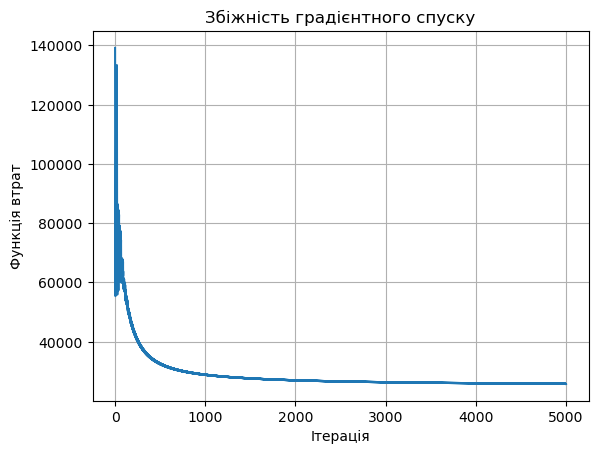

In [6]:
# Графік функції втрат
plt.plot(cost_history)
plt.xlabel('Ітерація')
plt.ylabel('Функція втрат')
plt.title('Збіжність градієнтного спуску')
plt.grid(True)
plt.show()

In [7]:
user_idx = 0
predicted_ratings = U[user_idx, :] @ V.T
top_movie_ids = np.argsort(-predicted_ratings)[:10]

In [8]:
# Завантаження назв фільмів
with open('movie_ids.txt', encoding='latin-1') as f:
    movie_titles = [line.strip().split(' ', 1)[1] for line in f.readlines()]

print("Top recommendations:")
for idx in top_movie_ids:
    print(f"{movie_titles[idx]} — Predicted rating: {predicted_ratings[idx]:.2f}")

Top recommendations:
Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995) — Predicted rating: 6.32
My Man Godfrey (1936) — Predicted rating: 6.00
Oscar & Lucinda (1997) — Predicted rating: 5.94
Grass Harp, The (1995) — Predicted rating: 5.79
American Buffalo (1996) — Predicted rating: 5.77
Fast, Cheap & Out of Control (1997) — Predicted rating: 5.76
Four Days in September (1997) — Predicted rating: 5.63
Pather Panchali (1955) — Predicted rating: 5.54
Close Shave, A (1995) — Predicted rating: 5.53
Madame Butterfly (1995) — Predicted rating: 5.50
